# Audio Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment10/AudioCluster.ipynb)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


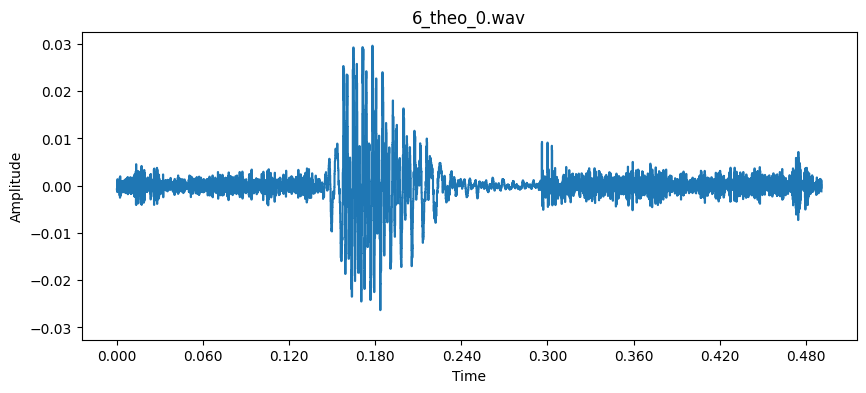

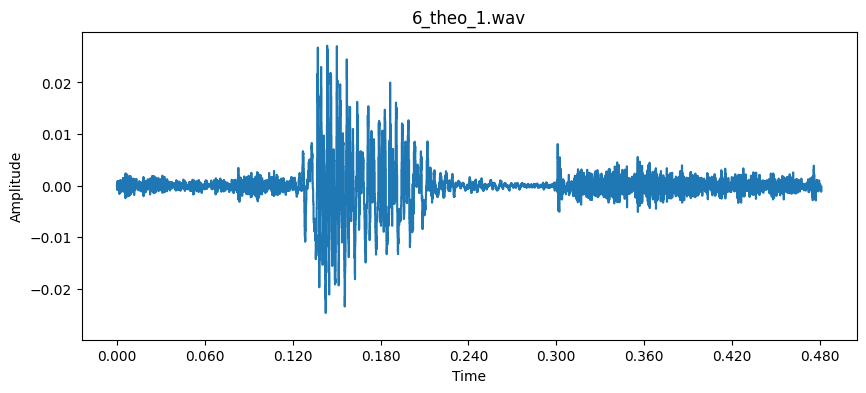

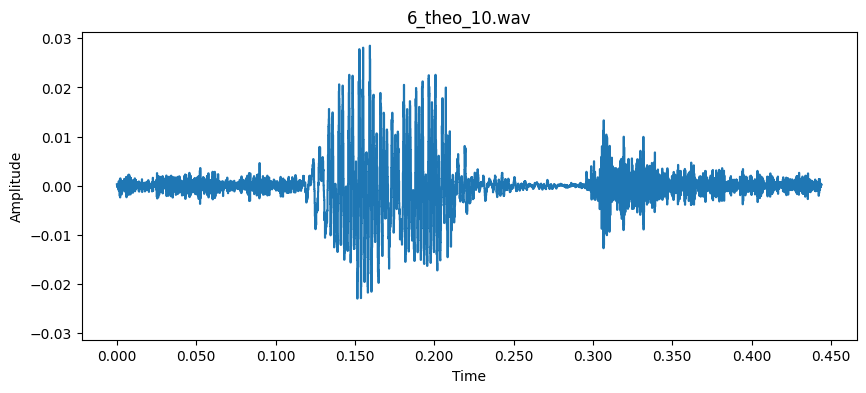

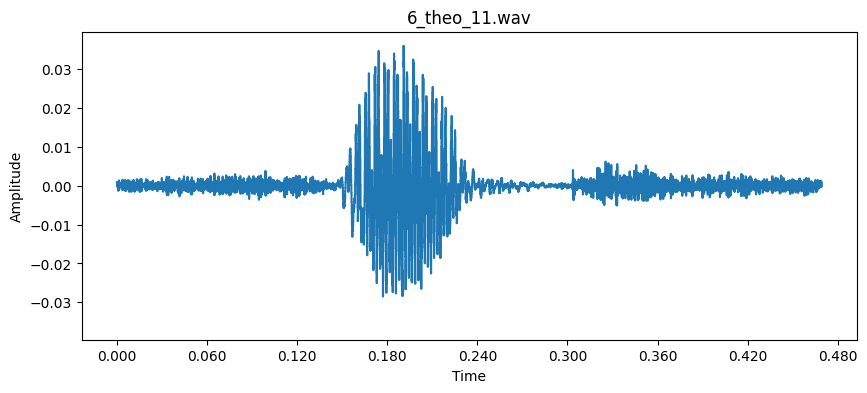

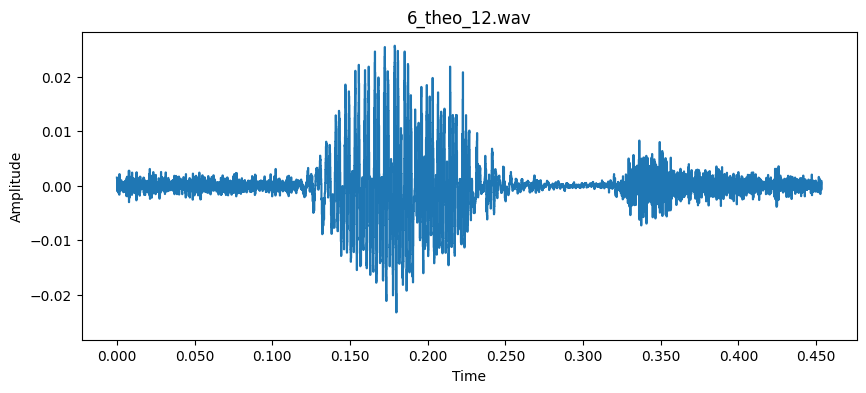

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the extracted audio dataset
audio_data_path = '/content/gdrive/MyDrive/DataMining/audio_mnist/recordings'

# Function to load and display an audio waveform
def display_audio_waveform(audio_path, title):
    audio, sr = librosa.load(audio_path, sr=None)  # Load audio file
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

# Display waveforms for a few audio files
audio_files = os.listdir(audio_data_path)
for audio_file in audio_files[:5]:  # Adjust the number as needed
    display_audio_waveform(os.path.join(audio_data_path, audio_file), audio_file)


The extracted dataset is the "Free Spoken Digit Dataset (FSDD)," a simple audio/speech dataset consisting of recordings of spoken digits in .wav files at 8kHz. The recordings are trimmed to have minimal silence at the beginnings and ends. Here are some key points from the README:

The dataset contains recordings from 6 speakers.
There are a total of 3,000 recordings, with 50 of each digit per speaker, all in English.
Files are organized in the format {digitLabel}_{speakerName}_{index}.wav, for example, 7_jackson_32.wav.
The dataset is open and contributors can add their recordings, provided they meet the specified criteria.

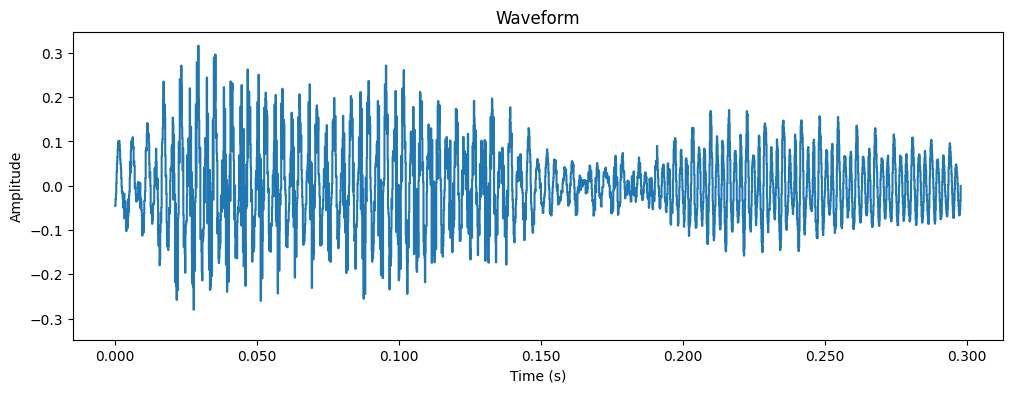

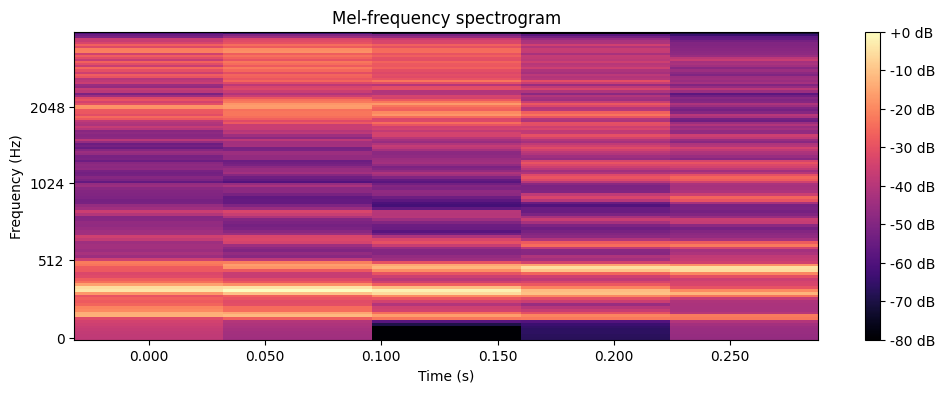

MFCCs shape: (13, 5)


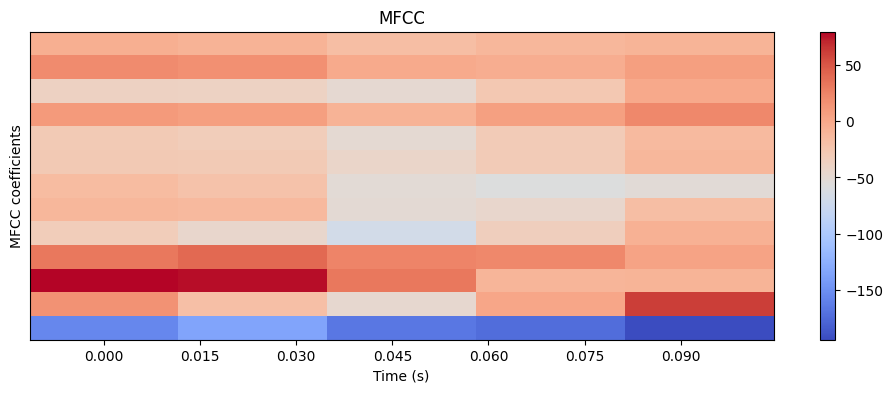

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
file_path = '/content/gdrive/MyDrive/DataMining/audio_mnist/recordings/0_george_0.wav'  # Replace with your audio file path
audio, sample_rate = librosa.load(file_path, sr=None)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot the spectrogram
plt.figure(figsize=(12, 4))
S = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
print("MFCCs shape:", mfccs.shape)

# Optionally, plot the MFCCs
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC coefficients')
plt.show()


In [5]:
import librosa
import numpy as np
from sklearn.cluster import KMeans
import os

# Directory containing the audio files
audio_dir = '/content/gdrive/MyDrive/DataMining/audio_mnist/recordings'  # Replace with your audio folder path

# Pre-process and extract features from all audio files
features = []
file_names = []
for file in os.listdir(audio_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(audio_dir, file)
        audio, sample_rate = librosa.load(file_path, sr=None)

        # Feature extraction (e.g., MFCCs)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        mfccs_mean = np.mean(mfccs, axis=1)

        # Append the extracted features to the list
        features.append(mfccs_mean)
        file_names.append(file)

# Convert the list of features to a numpy array
features_array = np.array(features)

# Clustering (using K-means as an example)
kmeans = KMeans(n_clusters=10)  # Assuming 10 clusters for the digits 0-9
kmeans.fit(features_array)

# Print the cluster assignments for each audio file
for file, cluster in zip(file_names, kmeans.labels_):
    print(f"{file} belongs to cluster {cluster}")


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1251
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1302
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1988
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1294
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1446
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1830
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py

6_theo_0.wav belongs to cluster 8
6_theo_1.wav belongs to cluster 8
6_theo_10.wav belongs to cluster 8
6_theo_11.wav belongs to cluster 8
6_theo_12.wav belongs to cluster 8
6_theo_13.wav belongs to cluster 8
6_theo_14.wav belongs to cluster 8
6_theo_15.wav belongs to cluster 8
6_theo_16.wav belongs to cluster 8
6_theo_17.wav belongs to cluster 8
6_theo_18.wav belongs to cluster 8
6_theo_19.wav belongs to cluster 8
6_theo_2.wav belongs to cluster 8
6_theo_20.wav belongs to cluster 8
6_theo_21.wav belongs to cluster 5
6_theo_22.wav belongs to cluster 5
6_theo_23.wav belongs to cluster 8
6_theo_24.wav belongs to cluster 8
6_theo_25.wav belongs to cluster 5
6_theo_26.wav belongs to cluster 8
6_theo_27.wav belongs to cluster 5
6_theo_28.wav belongs to cluster 5
6_theo_29.wav belongs to cluster 8
6_theo_3.wav belongs to cluster 8
6_theo_30.wav belongs to cluster 8
6_theo_31.wav belongs to cluster 8
6_theo_32.wav belongs to cluster 8
6_theo_33.wav belongs to cluster 8
6_theo_34.wav belongs to

Silhouette Score: 0.22826461493968964


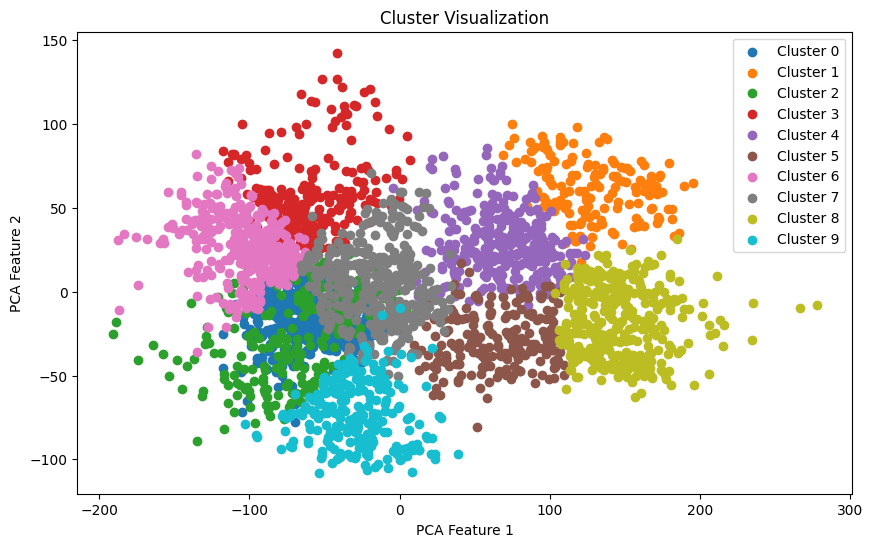

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(features_array, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_array)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(10):  # Assuming 10 clusters
    cluster_points = reduced_features[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.title('Cluster Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()
